## Database

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline

Databases de cada Local para facilitar a limpeza e padronização dos dataframes

In [39]:
#Lendo a base de dados
#df1=pd.read_csv('Focos_2018-12-31_2019-12-31.csv', low_memory=False)
#df2=pd.read_csv('Focos_2020-01-01_2020-10-04.csv', low_memory=False)
df=pd.read_csv("Focos_2019-10-04_2020-10-04.csv", low_memory=False)

In [40]:
#frames=[df1,df2]
#df = pd.concat(frames)

In [41]:
#demonstrando dados iniciais
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIAI,Cerrado,7.0,8.1,0.4,-16.916,-44.824,157.3
1,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,IBIAI,Cerrado,9.0,7.7,0.5,-16.917,-44.834,36.6
2,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,FRANCISCOPOLIS,Mata Atlantica,15.0,28.5,0.0,-18.018,-42.134,12.1
3,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,TEOFILO OTONI,Mata Atlantica,8.0,28.8,0.0,-18.023,-41.505,9.4
4,2019/10/22 16:40:00,AQUA_M-T,Brasil,MINAS GERAIS,PRESIDENTE OLEGARIO,Cerrado,5.0,3.4,0.2,-18.151,-46.168,11.1


In [57]:
#Retirando variáveis desnecessárias e separando a data e a hora
df[['data','hora']] = df.datahora.str.split(" ",expand=True,)

df_novo=df.drop(["datahora","satelite","bioma","municipio","estado","frp"], axis=1)

df_novo.data = df_novo.data.str.replace("/", " ")
df_novo[['ano','mes',"dia"]] = df_novo.data.str.split(" ",expand=True,)

df_novo['hora'] = df_novo['hora'].str.replace(r'\D', '')
df_novo['hora'] = df_novo['hora'].astype(int)
df_novo['mes'] = df_novo['mes'].astype(int)
df_novo['dia'] = df_novo['dia'].astype(int)

df_novo.loc[(60000< df_novo.hora) | (df_novo.hora<180000), "horario"]=0
df_novo.loc[(df_novo.hora>180000) | (df_novo.hora<60000), "horario"]=1


df_novo=df_novo.drop(["data","ano","hora"], axis=1)



df.novo=df_novo.dropna(how='any', inplace=True)
indexNames = df_novo[ (df_novo['diasemchuva'] < 0) | (df_novo['riscofogo'] < 0) ].index
df_novo.drop(indexNames , inplace=True)
#df_novo=df_novo.replace(-999, 0)

In [58]:
df_novo

,pais,diasemchuva,precipitacao,riscofogo,latitude,longitude,mes,dia,horario
0,Brasil,7.0,8.1,0.4,-16.916,-44.824,10,22,0.0
1,Brasil,9.0,7.7,0.5,-16.917,-44.834,10,22,0.0
2,Brasil,15.0,28.5,0.0,-18.018,-42.134,10,22,0.0
3,Brasil,8.0,28.8,0.0,-18.023,-41.505,10,22,0.0
4,Brasil,5.0,3.4,0.2,-18.151,-46.168,10,22,0.0
...,...,...,...,...,...,...,...,...,...
220867,Brasil,3.0,3.5,0.3,-15.199,-58.969,10,1,1.0
220868,Brasil,3.0,0.0,0.4,-10.675,-69.098,10,1,1.0
220869,Brasil,3.0,0.0,0.5,-10.632,-69.122,10,1,1.0
220870,Brasil,2.0,0.0,0.5,-10.477,-68.929,10,1,1.0


In [59]:
#df_novo.loc[(df_novo.mes>=3) & (df_novo.dia>=20) | (df_novo.mes<=6) & (df_novo.dia<21), "estacao"]="outono"
#df_novo.loc[(df_novo.mes>=6) & (df_novo.dia>=21) | (df_novo.mes<=9) & (df_novo.dia<23), "estacao"]="inverno"
#df_novo.loc[(df_novo.mes>=9) & (df_novo.dia>=23) | (df_novo.mes<=12) & (df_novo.dia<22), "estacao"]="primavera"
#df_novo.loc[(df_novo.mes==12) & (df_novo.dia<=22) | (df_novo.mes<=3) & (df_novo.dia<23), "estacao"]="verao"

In [60]:
# df_novo.mes >= 9:

#    if  (df_novo.dia>=23) & ((df_novo.mes<=12) & (df_novo.dia<=20)):
#        df_novo.loc["estacao"]="primavera"
#    elif ((df_novo.mes >= 10) & (df_novo.dia>=1)) & ((df_novo.mes<=12) & (df_novo.dia<=20)):
#        df_novo.loc["estacao"]="primavera"

In [61]:
df_novo.loc[(df_novo.mes==3) & (df_novo.dia>=20), "estacao"]=1
df_novo.loc[(df_novo.mes==6) & (df_novo.dia>=21), "estacao"]=2
df_novo.loc[(df_novo.mes==9) & (df_novo.dia>=23), "estacao"]=3
df_novo.loc[(df_novo.mes==12) & (df_novo.dia>=22), "estacao"]=4
df_novo.loc[(df_novo.mes<=6) & (df_novo.mes>3) | (df_novo.mes==6)  & (df_novo.dia<21) , "estacao"]=1
df_novo.loc[(df_novo.mes<=9) & (df_novo.mes>6) | (df_novo.mes==9) & (df_novo.dia<23), "estacao"]=2
df_novo.loc[(df_novo.mes<=12) & (df_novo.mes>9) | (df_novo.mes==12) & (df_novo.dia<22), "estacao"]=3
df_novo.loc[(df_novo.mes<=3) & (df_novo.mes>=1) | (df_novo.mes==3) & (df_novo.dia<23) , "estacao"]=4

In [62]:
df_novo.estacao.value_counts()


2.0    133235
3.0     56711
1.0     15021
4.0      9114
Name: estacao, dtype: int64

In [63]:
df_novo.mes.value_counts()

9     68901
8     48799
10    29171
11    20132
7     15535
12     7408
6      7034
4      4054
5      3933
3      3812
1      2762
2      2540
Name: mes, dtype: int64

In [64]:
df_novo

,pais,diasemchuva,precipitacao,riscofogo,latitude,longitude,mes,dia,horario,estacao
0,Brasil,7.0,8.1,0.4,-16.916,-44.824,10,22,0.0,3.0
1,Brasil,9.0,7.7,0.5,-16.917,-44.834,10,22,0.0,3.0
2,Brasil,15.0,28.5,0.0,-18.018,-42.134,10,22,0.0,3.0
3,Brasil,8.0,28.8,0.0,-18.023,-41.505,10,22,0.0,3.0
4,Brasil,5.0,3.4,0.2,-18.151,-46.168,10,22,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
220867,Brasil,3.0,3.5,0.3,-15.199,-58.969,10,1,1.0,3.0
220868,Brasil,3.0,0.0,0.4,-10.675,-69.098,10,1,1.0,3.0
220869,Brasil,3.0,0.0,0.5,-10.632,-69.122,10,1,1.0,3.0
220870,Brasil,2.0,0.0,0.5,-10.477,-68.929,10,1,1.0,3.0


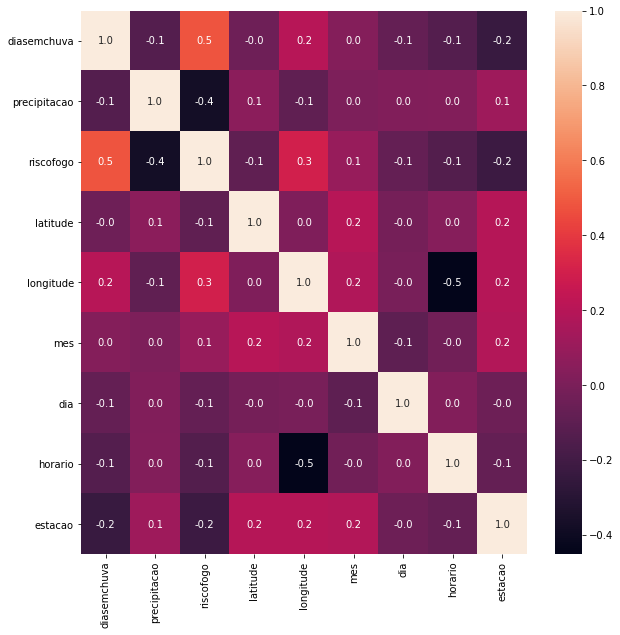

In [65]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_novo.corr(),annot= True, fmt='.1f')

In [66]:
'''fig=plt.figure(figsize=(10,10))

#Riscofogo X Precipitação
plt.subplot(221)
plt.scatter(df_novo.riscofogo,df_novo.precipitacao)
plt.title("Riscofogo X Precipitação")
plt.ylabel("Precipitação")
plt.xlabel("Risco de Fogo")

#Riscofogo X Dias Sem chuva
plt.subplot(222)
plt.scatter(df_novo.riscofogo,df_novo.diasemchuva)
plt.title("Riscofogo X Dias Sem chuva")
plt.ylabel("Dias sem chuva")
plt.xlabel("Risco de Fogo")

#Riscofogo X Latitude
plt.subplot(223)
plt.scatter(df_novo.riscofogo,df_novo.latitude)
plt.title("Riscofogo X Latitude")
plt.ylabel("Latitude")
plt.xlabel("Risco de Fogo")

#Riscofogo X Longitude
plt.subplot(224)
plt.scatter(df_novo.riscofogo,df_novo.longitude)
plt.title("Riscofogo X Longitude")
plt.ylabel("Longitude")
plt.xlabel("Risco de Fogo")

plt.show()'''

'fig=plt.figure(figsize=(10,10))\n\n#Riscofogo X Precipitação\nplt.subplot(221)\nplt.scatter(df_novo.riscofogo,df_novo.precipitacao)\nplt.title("Riscofogo X Precipitação")\nplt.ylabel("Precipitação")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Dias Sem chuva\nplt.subplot(222)\nplt.scatter(df_novo.riscofogo,df_novo.diasemchuva)\nplt.title("Riscofogo X Dias Sem chuva")\nplt.ylabel("Dias sem chuva")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Latitude\nplt.subplot(223)\nplt.scatter(df_novo.riscofogo,df_novo.latitude)\nplt.title("Riscofogo X Latitude")\nplt.ylabel("Latitude")\nplt.xlabel("Risco de Fogo")\n\n#Riscofogo X Longitude\nplt.subplot(224)\nplt.scatter(df_novo.riscofogo,df_novo.longitude)\nplt.title("Riscofogo X Longitude")\nplt.ylabel("Longitude")\nplt.xlabel("Risco de Fogo")\n\nplt.show()'

Text(0.5, 1.0, 'Probplot:Longitude')

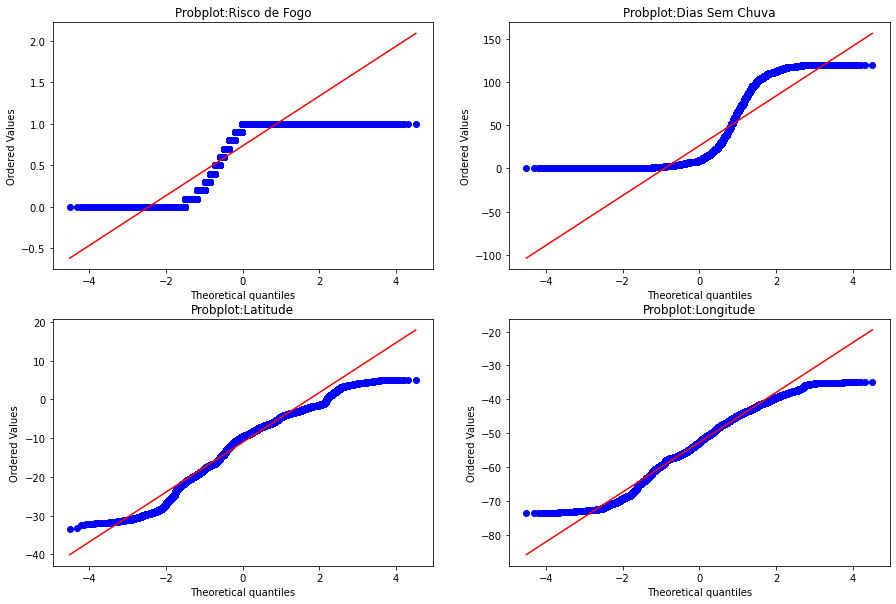

In [67]:
fig=plt.figure(figsize=(15,10))

plt.subplot(221)
stats.probplot(df_novo.riscofogo, plot = plt )
plt.title("Probplot:Risco de Fogo")

plt.subplot(222)
stats.probplot(df_novo.diasemchuva, plot = plt )
plt.title("Probplot:Dias Sem Chuva")

plt.subplot(223)
stats.probplot(df_novo.latitude, plot = plt )
plt.title("Probplot:Latitude")

plt.subplot(224)
stats.probplot(df_novo.longitude, plot = plt )
plt.title("Probplot:Longitude")

In [11]:
#Salvando base de dados como CSV
#df_novo.to_csv('BaseDeDados.csv')